In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

In [3]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

In [7]:
print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [8]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [12]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
6879,AM,COVID,HOSPITAL,60 - 69,F,233
794,RR,INDETERMINADA,HOSPITAL,< 9,M,1
11606,SP,PNEUMONIA,DOMICILIO,80 - 89,M,384
9840,SC,PNEUMONIA,OUTRO,70 - 79,M,5
2769,AC,COVID,DOMICILIO,30 - 39,M,1


In [15]:
len(dados_2020['uf'].unique())

27

In [16]:
dados_2020['tipo_doenca'].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [19]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [20]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [41]:
total_obitos_2019 = dados_2019.groupby('tipo_doenca')['total'].sum()
total_obitos_2020 = dados_2020.groupby('tipo_doenca')['total'].sum()

In [42]:
total_obitos_2019

tipo_doenca
COVID                              1
INDETERMINADA                   6977
INSUFICIENCIA_RESPIRATORIA    100361
OUTRAS                        658891
PNEUMONIA                     225933
SEPTICEMIA                    175104
SRAG                            1497
Name: total, dtype: int64

In [43]:
total_obitos_2020

tipo_doenca
COVID                         177299
INDETERMINADA                   9063
INSUFICIENCIA_RESPIRATORIA     93304
OUTRAS                        647807
PNEUMONIA                     171938
SEPTICEMIA                    153033
SRAG                           15715
Name: total, dtype: int64

In [48]:
proporcao = (total_obitos_2020 / total_obitos_2019)
proporcao

tipo_doenca
COVID                         177299.000000
INDETERMINADA                      1.298982
INSUFICIENCIA_RESPIRATORIA         0.929684
OUTRAS                             0.983178
PNEUMONIA                          0.761013
SEPTICEMIA                         0.873955
SRAG                              10.497662
Name: total, dtype: float64

In [61]:
def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby('tipo_doenca')['total'].sum()
    total_2020 = dados_2020.groupby('tipo_doenca')['total'].sum()
    
    lista = [total_obitos_2019.loc[causa], total_obitos_2020.loc[causa]]

    dados = pd.DataFrame({'Total': lista,
                           'Ano': [2019,2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x ='Ano', y ='Total', data = dados)
    plt.title(f'Obitos por {causa}')
    plt.show()
    return dados


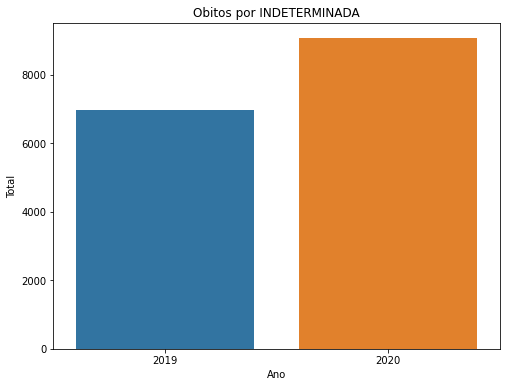

,Total,Ano
0,6977,2019
1,9063,2020


In [63]:
grafico_comparativo('INDETERMINADA')

In [50]:
total_obitos_2019.loc["SRAG"]

1497

## Desafio 01: Acessar o portal e verificar como são classificados os dados

## Desafio 02: Corrigir o erro do Thiago

In [34]:
dados_2020.groupby(['tipo_doenca'])['total'].sum()

tipo_doenca
COVID                         177299
INDETERMINADA                   9063
INSUFICIENCIA_RESPIRATORIA     93304
OUTRAS                        647807
PNEUMONIA                     171938
SEPTICEMIA                    153033
SRAG                           15715
Name: total, dtype: int64

## Desafio 03: Explorar os outros campos da base